In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/Admin/Desktop/MS BIA/Spring 2021/Industry Capstone Project/SprayTek_ProductionData_csv.csv')

In [3]:
df1 = df.drop(columns = ['Flow', 'Hygroscopicity', 'Bulk Density', 'Moisture',
                         'ContainerNet', 'Container', 'ContainerID'])
df1.sample(5)

,OrderEntryDate,OrginalScheduleDate,ActualStartDate,ReleaseDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,ttlBatches
429,3/11/16 15:07,3/11/16 15:07,3/26/16 12:40,3/11/16 15:07,NJSD317153,10558-0000,Dryer 03,4270.4120,3560.5999,83.4,6.2,8.1,7.5,21.8,Fragrance,2
5402,10/9/18 10:50,11/14/18 10:48,11/14/18 12:45,10/23/18 9:05,NJSD352383,44190-0000,Dryer 03,4651.5341,2853.0000,61.3,5.6,4.9,9.9,20.4,Fragrance,9
5254,9/24/18 9:00,10/19/18 5:59,10/19/18 3:50,9/24/18 9:37,NJSD351967,42456-0000,Dryer 01,1103.3030,1050.0000,95.2,3.3,5.2,0.4,8.8,Flavors,1
330,3/4/16 10:42,3/4/16 10:40,3/4/16 19:54,3/4/16 10:42,PASD316911,23423-0000,Dryer 06,23551.0278,18900.1993,80.3,119.0,0.0,3.6,122.7,Flavors,27
8349,3/10/20 12:02,3/10/20 12:01,3/29/20 5:30,3/20/20 9:18,NJSD368906,42655-0000,Dryer 01,2764.9624,2699.8999,97.6,6.7,4.5,0.4,11.7,Vitamin,1


In [4]:
df1.describe()

,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ttlBatches
count,9969.000000,9956.000000,9961.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000
mean,8944.787058,8348.359213,91.214466,21.752849,6.339228,4.596861,32.653591,5.036409
std,13974.411561,13350.619864,13.582797,23.249582,6.556783,7.568556,29.983541,6.930778
min,5.680500,0.100000,0.000000,0.000000,-9.200000,0.000000,0.000000,1.000000
25%,1559.935000,1423.374925,88.700000,5.725000,3.500000,0.600000,12.200000,1.000000
50%,4400.696400,4263.649950,93.300000,13.900000,5.300000,1.900000,22.500000,2.000000
75%,10878.646600,10034.850000,96.600000,30.600000,7.700000,5.500000,42.800000,6.000000
max,301195.720000,293923.198200,864.900000,221.500000,172.100000,127.400000,284.700000,120.000000


In [5]:
df1.isnull().sum()

OrderEntryDate          0
OrginalScheduleDate     0
ActualStartDate         0
ReleaseDate             0
BatchNumber             0
CustItem                1
Dryer                   0
ScheduledDryQty         1
ActualDryQty           14
YieldPercentage         9
DryingTime_Hrs          0
CleanTime_Hrs           0
DownTime_Hrs            0
TotalRunTime_Hrs        0
ProdLine                9
ttlBatches              0
dtype: int64

### If ActualDryQty is null, ActualDryQty = ScheduledDryQty 

In [6]:
df1.ActualDryQty.fillna(df1.ScheduledDryQty,inplace=True)
df1 = df1.drop(columns = 'ScheduledDryQty')

In [ ]:
## Yield Percentage preserved only between range 50-100

In [7]:
df1.loc[(df1.YieldPercentage > 100),'YieldPercentage'] = 100

In [8]:
df1.drop(df1[df1['YieldPercentage'] < 50].index, inplace = True)

In [ ]:
## Filling null values in ProdLine with mode.

In [9]:
df1.ProdLine.fillna(df1.ProdLine.mode()[0],inplace=True)

In [10]:
df1['ProdLine'].value_counts()

Flavors          5312
Fragrance        2188
Chemical          704
Nutraceutical     682
Food Additive     464
Vitamin           273
Food Addit        122
Pharma             87
Cosmetic           51
Name: ProdLine, dtype: int64

In [11]:
df1 = df1.dropna()
df1.isnull().sum()

OrderEntryDate         0
OrginalScheduleDate    0
ActualStartDate        0
ReleaseDate            0
BatchNumber            0
CustItem               0
Dryer                  0
ActualDryQty           0
YieldPercentage        0
DryingTime_Hrs         0
CleanTime_Hrs          0
DownTime_Hrs           0
TotalRunTime_Hrs       0
ProdLine               0
ttlBatches             0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 0 to 9969
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderEntryDate       9872 non-null   object 
 1   OrginalScheduleDate  9872 non-null   object 
 2   ActualStartDate      9872 non-null   object 
 3   ReleaseDate          9872 non-null   object 
 4   BatchNumber          9872 non-null   object 
 5   CustItem             9872 non-null   object 
 6   Dryer                9872 non-null   object 
 7   ActualDryQty         9872 non-null   float64
 8   YieldPercentage      9872 non-null   float64
 9   DryingTime_Hrs       9872 non-null   float64
 10  CleanTime_Hrs        9872 non-null   float64
 11  DownTime_Hrs         9872 non-null   float64
 12  TotalRunTime_Hrs     9872 non-null   float64
 13  ProdLine             9872 non-null   object 
 14  ttlBatches           9872 non-null   int64  
dtypes: float64(6), int64(1), object(8)
mem

In [15]:
df1['OrderEntryDate'] = pd.to_datetime(df1['OrderEntryDate'])
df1['OrginalScheduleDate'] = pd.to_datetime(df1['OrginalScheduleDate'])
df1['ActualStartDate'] = pd.to_datetime(df1['ActualStartDate'])
df1['ReleaseDate'] = pd.to_datetime(df1['ReleaseDate'])

In [16]:
from datetime import datetime, timedelta

In [17]:
df1['Final_EndTime'] = df1['ActualStartDate'] + pd.TimedeltaIndex(df1['TotalRunTime_Hrs'], unit = 'D')
df1['Drying_EndTime'] = df1['ActualStartDate'] + pd.TimedeltaIndex(df1['DryingTime_Hrs'], unit = 'D')
df1['Cleaning_EndTime'] = df1['ActualStartDate'] + pd.TimedeltaIndex(df1['CleanTime_Hrs'], unit = 'D')

In [18]:
df1 = df1[['BatchNumber', 'OrderEntryDate', 'OrginalScheduleDate', 'ReleaseDate', 'ActualStartDate',
           'Drying_EndTime', 'DryingTime_Hrs', 'Cleaning_EndTime', 'CleanTime_Hrs', 'DownTime_Hrs', 'Final_EndTime', 
           'TotalRunTime_Hrs', 'CustItem', 'ProdLine', 'ActualDryQty', 'Dryer', 'ttlBatches', 
           'YieldPercentage']]

In [19]:
df1.to_excel(r'/Users/Admin/Desktop/MS BIA/Spring 2021/Industry Capstone Project/Apoorv Akhouri_Spray Tek Report/DF1.xlsx', index = False)

### Which Dryer is processing which ProdLine the most? [ .idxmax() ] 

In [20]:
ProdlineInfo = df1['ProdLine'].value_counts()
ProdlineInfo

Flavors          5306
Fragrance        2188
Chemical          703
Nutraceutical     681
Food Additive     461
Vitamin           273
Food Addit        122
Pharma             87
Cosmetic           51
Name: ProdLine, dtype: int64

In [21]:
# To display full length output from ProdLine_by_Dryer_info
### pd.set_option('display.max_rows', None)
ProdlineByDryerInfo = df1.groupby('Dryer').apply(lambda x: x['ProdLine'].value_counts())

In [22]:
print(ProdlineByDryerInfo)

Dryer                  
Dryer 01  Flavors          1994
          Food Additive     132
          Vitamin            56
          Chemical            6
          Food Addit          6
                           ... 
Dryer 10  Food Addit         47
          Pharma              3
Dryer 11  Flavors            17
          Food Addit          2
          Food Additive       2
Name: ProdLine, Length: 71, dtype: int64


### refer report ->

In [ ]:
## Process Times Calculation verification
## create a colummn which will be CleanTime + DryingTime + DownTime should be equal to TotalRunTime
## But as Eric mentioned, there can be minor difference in times due to dividing consignments into batches
## thus, we take difference of CleanTime + DryingTime + DownTime & TotalRunTime, & check if the mean is close to 0.

In [23]:
df1['Test'] = df1['CleanTime_Hrs'] + df1['DryingTime_Hrs'] + df1['DownTime_Hrs']
df1['Result'] = df1['TotalRunTime_Hrs'] - df1['Test']
df1['Result'].mean()

<ipython-input-23-9722a78aa12a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Test'] = df1['CleanTime_Hrs'] + df1['DryingTime_Hrs'] + df1['DownTime_Hrs']
<ipython-input-23-9722a78aa12a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Result'] = df1['TotalRunTime_Hrs'] - df1['Test']


-0.034187601296596294

In [24]:
df1 = df1.drop(columns = ['Test', 'Result'])

In [ ]:
# Dryers vs Process Times

In [ ]:
## For this correlation analysis it would be better to work with:
## df2: DataFrame without the outliers w.r.t DryingTime, CleanTime, DownTime & TotalRunTime
#### IQR for DryingTime, CleanTime, DownTime & TotalRunTime

<AxesSubplot:>

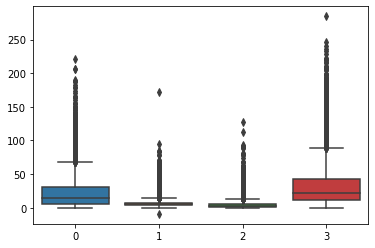

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data= [df1['DryingTime_Hrs'], df1['CleanTime_Hrs'], df1['DownTime_Hrs'], df1['TotalRunTime_Hrs']])

In [85]:
df3 = df1

In [86]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3-Q1
print(IQR)

DryingTime_Hrs        25.000
CleanTime_Hrs          4.200
DownTime_Hrs           4.800
TotalRunTime_Hrs      30.700
ActualDryQty        8653.825
ttlBatches             5.000
YieldPercentage        7.700
dtype: float64


In [87]:
df3_float = df3[['DryingTime_Hrs', 'CleanTime_Hrs', 'DownTime_Hrs', 'TotalRunTime_Hrs', 'ActualDryQty', 'ttlBatches', 'YieldPercentage']]

In [88]:
print(df3_float.shape)
df3_clean = df3_float[~((df3_float < (Q1 - 1.5 *IQR)) | (df3_float > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df3_clean.shape)

(9872, 7)
(7107, 7)


In [89]:
df3_clean.sample(5)

,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ActualDryQty,ttlBatches,YieldPercentage
1394,1.0,9.1,0.0,10.1,881.6000,1,87.9
4461,0.0,0.0,0.0,0.1,6655.9998,2,98.7
2811,5.5,5.9,0.3,11.8,2095.1000,1,99.2
6716,17.8,13.9,4.2,35.9,8200.0000,4,86.5
6383,13.7,5.9,0.4,20.0,2250.0000,2,97.2


In [91]:
df3_clean = pd.merge(df3_clean, df3, how = "left", on = ['DryingTime_Hrs', 'CleanTime_Hrs', 'DownTime_Hrs', 'TotalRunTime_Hrs', 'ActualDryQty', 'ttlBatches', 'YieldPercentage'])

In [99]:
df3 = df3_clean
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8075 entries, 0 to 8074
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DryingTime_Hrs       8075 non-null   float64       
 1   CleanTime_Hrs        8075 non-null   float64       
 2   DownTime_Hrs         8075 non-null   float64       
 3   TotalRunTime_Hrs     8075 non-null   float64       
 4   ActualDryQty         8075 non-null   float64       
 5   ttlBatches           8075 non-null   int64         
 6   YieldPercentage      8075 non-null   float64       
 7   BatchNumber          8075 non-null   object        
 8   OrderEntryDate       8075 non-null   datetime64[ns]
 9   OrginalScheduleDate  8075 non-null   datetime64[ns]
 10  ReleaseDate          8075 non-null   datetime64[ns]
 11  ActualStartDate      8075 non-null   datetime64[ns]
 12  Drying_EndTime       8075 non-null   datetime64[ns]
 13  Cleaning_EndTime     8075 non-nul

In [102]:
df3 = df3[['BatchNumber', 'OrderEntryDate', 'OrginalScheduleDate', 'ReleaseDate', 'ActualStartDate',
           'Drying_EndTime', 'DryingTime_Hrs', 'Cleaning_EndTime', 'CleanTime_Hrs', 'DownTime_Hrs', 'Final_EndTime', 
           'TotalRunTime_Hrs', 'CustItem', 'ProdLine', 'ActualDryQty', 'Dryer', 'ttlBatches', 
           'YieldPercentage']]
df3.sample(10)

,BatchNumber,OrderEntryDate,OrginalScheduleDate,ReleaseDate,ActualStartDate,Drying_EndTime,DryingTime_Hrs,Cleaning_EndTime,CleanTime_Hrs,DownTime_Hrs,Final_EndTime,TotalRunTime_Hrs,CustItem,ProdLine,ActualDryQty,Dryer,ttlBatches,YieldPercentage
491,NJSD320519,2016-06-02 13:23:00,2016-06-02 13:22:00,2016-06-02 15:51:00,2016-06-03 00:47:00,2016-06-08 10:23:00,5.4,2016-06-08 03:11:00,5.1,0.4,2016-06-14 00:47:00,11.0,41254-0000,Flavors,1693.0,Dryer 01,1,93.6
5614,PASD359699,2019-06-27 15:04:00,2019-07-24 15:02:00,2019-07-23 08:22:00,2019-07-23 23:33:00,2019-08-24 18:45:00,31.8,2019-07-28 13:57:00,4.6,5.9,2019-09-04 06:45:00,42.3,44695-0000,Flavors,6100.0,Dryer 07,8,78.1
5886,NJSD362360,2019-09-10 09:51:00,2019-10-10 05:48:00,2019-09-17 12:01:00,2019-09-17 23:51:00,2019-09-21 09:27:00,3.4,2019-09-22 07:03:00,4.3,0.4,2019-09-26 02:15:00,8.1,23978-0000,Flavors,896.0,Dryer 01,1,88.6
5701,NJSD357950,2019-04-22 08:03:00,2019-07-08 08:02:00,2019-08-09 06:22:00,2019-08-09 10:55:00,2019-08-24 15:43:00,15.2,2019-08-14 10:55:00,5.0,1.0,2019-08-30 13:19:00,21.1,43130-0000,Flavors,9160.0,Dryer 02,3,98.0
563,NJSD319494,2016-05-06 11:08:00,2016-06-24 17:07:00,2016-06-30 08:28:00,2016-07-01 14:58:00,2016-07-06 14:58:00,5.0,2016-07-09 14:58:00,8.0,5.1,2016-07-19 19:46:00,18.2,22745-0000,Flavors,3154.0,Dryer 02,1,93.3
1407,PASD331595,2017-02-10 17:05:00,2017-03-16 09:03:00,2017-03-16 15:52:00,2017-03-21 03:04:00,2017-03-25 15:04:00,4.5,2017-03-23 10:16:00,2.3,1.0,2017-03-28 22:16:00,7.8,42373-0000,Flavors,1695.0,Dryer 06,1,84.7
7892,PASD377046,2020-10-14 12:08:00,2020-10-14 12:05:00,2020-11-16 11:12:00,2020-11-18 04:40:00,2020-12-22 21:28:00,34.7,2020-11-24 19:04:00,6.6,6.2,2021-01-04 16:40:00,47.5,48025-0000,Flavors,19900.0,Dryer 10,8,93.0
6343,PASD366169,2020-01-07 07:39:00,2020-01-10 07:38:00,2020-01-09 21:01:00,2020-01-14 02:28:00,2020-01-28 19:16:00,14.7,2020-01-22 16:52:00,8.6,2.5,2020-02-09 00:04:00,25.9,45230-0000,Flavors,4250.0,Dryer 06,3,91.5
7723,NJSD376447,2020-10-02 07:56:00,2020-10-08 07:55:00,2020-10-07 08:22:00,2020-10-09 00:39:00,2020-10-17 07:51:00,8.3,2020-10-13 10:15:00,4.4,3.5,2020-10-25 05:27:00,16.2,41935-0000,Flavors,2000.0,Dryer 01,1,93.4
3291,NJSD348125,2018-05-26 01:26:00,2018-06-10 04:25:00,2018-06-08 13:39:00,2018-06-08 22:20:00,2018-06-12 00:44:00,3.1,2018-06-17 00:44:00,8.1,1.0,2018-06-21 03:08:00,12.2,44141-0000,Flavors,1973.9,Dryer 02,1,93.9


In [105]:
df2 = df3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8075 entries, 0 to 8074
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BatchNumber          8075 non-null   object        
 1   OrderEntryDate       8075 non-null   datetime64[ns]
 2   OrginalScheduleDate  8075 non-null   datetime64[ns]
 3   ReleaseDate          8075 non-null   datetime64[ns]
 4   ActualStartDate      8075 non-null   datetime64[ns]
 5   Drying_EndTime       8075 non-null   datetime64[ns]
 6   DryingTime_Hrs       8075 non-null   float64       
 7   Cleaning_EndTime     8075 non-null   datetime64[ns]
 8   CleanTime_Hrs        8075 non-null   float64       
 9   DownTime_Hrs         8075 non-null   float64       
 10  Final_EndTime        8075 non-null   datetime64[ns]
 11  TotalRunTime_Hrs     8075 non-null   float64       
 12  CustItem             8075 non-null   object        
 13  ProdLine             8075 non-nul

In [106]:
import numpy as np

In [107]:
for w in ['TotalRunTime_Hrs']:
    q75,q25 = np.percentile(df2.loc[:,w],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[w] < min,w] = np.nan
    df2.loc[df2[w] > max,w] = np.nan

for x in ['DryingTime_Hrs']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan
    
for y in ['CleanTime_Hrs']:
    q75,q25 = np.percentile(df2.loc[:,y],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[y] < min,y] = np.nan
    df2.loc[df2[y] > max,y] = np.nan
    
for z in ['DownTime_Hrs']:
    q75,q25 = np.percentile(df2.loc[:,z],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[z] < min,z] = np.nan
    df2.loc[df2[z] > max,z] = np.nan

In [108]:
df2.isnull().sum()

BatchNumber              0
OrderEntryDate           0
OrginalScheduleDate      0
ReleaseDate              0
ActualStartDate          0
Drying_EndTime           0
DryingTime_Hrs         360
Cleaning_EndTime         0
CleanTime_Hrs           98
DownTime_Hrs           710
Final_EndTime            0
TotalRunTime_Hrs       385
CustItem                 0
ProdLine                 0
ActualDryQty             0
Dryer                    0
ttlBatches               0
YieldPercentage          0
dtype: int64

In [109]:
df2 = df2.dropna(axis=0)

In [110]:
df2.shape

(7065, 18)

In [111]:
from numpy.random import seed
from scipy.stats import spearmanr

seed(26195)

In [112]:
corr, _ = spearmanr(df2['Dryer'], df2['CleanTime_Hrs'])
print('Spearmans correlation [Dryer vs Clean Time]: %.3f' % corr)

Spearmans correlation [Dryer vs Clean Time]: 0.035


In [113]:
corr, _ = spearmanr(df2['Dryer'], df2['DryingTime_Hrs'])
print('Spearmans correlation [Dryer vs Drying Time]: %.3f' % corr)

Spearmans correlation [Dryer vs Drying Time]: -0.004


In [114]:
corr, _ = spearmanr(df2['Dryer'], df2['DownTime_Hrs'])
print('Spearmans correlation [Dryer vs Down Time]: %.3f' % corr)

Spearmans correlation [Dryer vs Down Time]: -0.253


In [115]:
corr, _ = spearmanr(df2['Dryer'], df2['TotalRunTime_Hrs'])
print('Spearmans correlation [Dryer vs Total Run Time]: %.3f' % corr)

Spearmans correlation [Dryer vs Total Run Time]: -0.011


In [ ]:
df2.info()

Further notes:
* Downtime as y variable
* check efficiency through clustering based on ActualDryQty. [find relevant attributes for efficiency] [Rate = ActualDryQty / TotalRunTime]